# Notebook with procedure and answers
- Author: José Roberto Pérez
- Date: 26/Jun/2021

## Imports

#### Standard library imports

In [1]:
import sys

#### Third party imports

In [2]:
import pandas as pd

import plotly.express as px

#### Local application imports

In [3]:
sys.path.append("../")

In [4]:
%load_ext autoreload
%autoreload 2

---

## Importing data and initial cleaning

### Clients

#### Creating dataframe

In [5]:
dfc = pd.read_csv("../data/cliente_tabla.csv")

In [6]:
dfc

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT
...,...,...
935357,11011586,OXXO PETEN
935358,11693264,SUPER ABARROTES MARY
935359,19988629,NO IDENTIFICADO
935360,99999999,NO IDENTIFICADO


In [7]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935362 entries, 0 to 935361
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Cliente_ID     935362 non-null  int64 
 1   NombreCliente  935362 non-null  object
dtypes: int64(1), object(1)
memory usage: 14.3+ MB


#### Eliminating duplicate client IDs

In [8]:
## Counting number of unique ID's
dfx = dfc["Cliente_ID"].value_counts().to_frame()
dfx

,Cliente_ID
544701,2
19703,2
292628,2
1896182,2
12732,2
...,...
2415040,1
4510145,1
4508098,1
324037,1


In [9]:
## Counting unique and duplicated id's
dfx.value_counts()

Cliente_ID
1             925638
2               4862
dtype: int64

In [10]:
## List with duplicated id's
lx = list(dfx[dfx["Cliente_ID"] > 1].index)

In [11]:
## Filtering duplicated id's
dfc[dfc["Cliente_ID"].isin(lx)]

,Cliente_ID,NombreCliente
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT
5,4,SDN SER DE ALIM CUERPO SA CIA DE INT
62,262,BALNEARIO IXTAPAN S DE R L DE C V
63,262,BALNEARIO IXTAPAN S DE R L DE C V
64,465,ESCUELA PREPARAROTIA NO 5
...,...,...
932959,9533930,SERVIFARMACIAS PACIFICO S A DE C V
933798,9612023,GRUPO FERMOSELLE S A DE C V
933799,9612023,GRUPO FERMOSELLE S A DE C V
934732,9694173,OXXO DR COSS


In [12]:
## Eliminating entries with duplicated id's
dfc.drop_duplicates(subset=["Cliente_ID"], inplace=True)

#### Resulting dataframe

In [13]:
dfc

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT
...,...,...
935357,11011586,OXXO PETEN
935358,11693264,SUPER ABARROTES MARY
935359,19988629,NO IDENTIFICADO
935360,99999999,NO IDENTIFICADO


### Products

#### Importing data

In [14]:
dfp = pd.read_csv("../data/producto_tabla.csv")

In [15]:
dfp

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72
...,...,...
2587,49992,Tostado Integral 180g MTA WON 49992
2588,49993,Tostado Integral 180g TAB WON 49993
2589,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994
2590,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996


In [16]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Producto_ID     2592 non-null   int64 
 1   NombreProducto  2592 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


### Locations

In [17]:
dfl = pd.read_csv("../data/town_state_small.csv")

In [18]:
dfl

,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."
5,1116,2011 AG. SAN ANTONIO,"MÉXICO, D.F."
6,1117,2001 AG. ATIZAPAN,ESTADO DE MÉXICO
7,1118,2007 AG. LA VILLA,"MÉXICO, D.F."
8,1119,2013 AG. MEGA NAUCALPAN,ESTADO DE MÉXICO
9,1120,2018 AG. TEPALCATES 2,"MÉXICO, D.F."


### Training data

#### Importing data

In [101]:
dftr = pd.read_csv("../data/df_[candidate]_small.csv")

In [102]:
dftr

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
7974413,8,1173,4,6609,4549706,1242,2,15.40,0,0.0,2
7974414,8,1173,4,6609,4549706,5310,12,60.48,0,0.0,12
7974415,8,1173,4,6609,4549706,40447,10,108.00,0,0.0,10
7974416,8,1173,4,6609,4549706,40450,18,331.20,0,0.0,18


#### Adding new column with demand in currency

In [103]:
dftr["Demanda_equil"] = dftr.apply(lambda x: x["Venta_hoy"] - x["Dev_proxima"] if (x["Venta_hoy"] - x["Dev_proxima"]) > 0 else 0, axis=1)

#### Resulting dataframe

In [104]:
dftr

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Demanda_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,25.14
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4,33.52
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4,39.32
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4,33.52
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3,22.92
...,...,...,...,...,...,...,...,...,...,...,...,...
7974413,8,1173,4,6609,4549706,1242,2,15.40,0,0.0,2,15.40
7974414,8,1173,4,6609,4549706,5310,12,60.48,0,0.0,12,60.48
7974415,8,1173,4,6609,4549706,40447,10,108.00,0,0.0,10,108.00
7974416,8,1173,4,6609,4549706,40450,18,331.20,0,0.0,18,331.20


### Test data

#### Importing data

In [21]:
dfts = pd.read_csv("../data/df_[test]_small.csv")

In [22]:
dfts

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,9,1110,7,3301,15766,1212
1,9,1110,7,3301,15766,1238
2,9,1110,7,3301,15766,1240
3,9,1110,7,3301,15766,1242
4,9,1110,7,3301,15766,1250
...,...,...,...,...,...,...
1337908,9,1173,4,6609,4549706,5310
1337909,9,1173,4,6609,4549706,31717
1337910,9,1173,4,6609,4549706,40447
1337911,9,1173,4,6609,4549706,40450


---

## EDA

### How have the overall demand top-5 product-client-agency combinations behaved each week?

#### Working dataframe

In [23]:
dfx = dftr.copy()

In [24]:
dfx

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
7974413,8,1173,4,6609,4549706,1242,2,15.40,0,0.0,2
7974414,8,1173,4,6609,4549706,5310,12,60.48,0,0.0,12
7974415,8,1173,4,6609,4549706,40447,10,108.00,0,0.0,10
7974416,8,1173,4,6609,4549706,40450,18,331.20,0,0.0,18


#### Preparing dataframe for graph

##### Eliminating non relevant columns

In [25]:
nrc = [
    "Canal_ID",
    "Ruta_SAK",
    "Venta_uni_hoy",
    "Venta_hoy",
    "Dev_uni_proxima",
    "Dev_proxima"
]

dfx.drop(nrc, axis=1, inplace=True)

In [26]:
dfx

,Semana,Agencia_ID,Cliente_ID,Producto_ID,Demanda_uni_equil
0,3,1110,15766,1212,3
1,3,1110,15766,1216,4
2,3,1110,15766,1238,4
3,3,1110,15766,1240,4
4,3,1110,15766,1242,3
...,...,...,...,...,...
7974413,8,1173,4549706,1242,2
7974414,8,1173,4549706,5310,12
7974415,8,1173,4549706,40447,10
7974416,8,1173,4549706,40450,18


##### Creating unique `Agencia_ID`, `Cliente_ID`, `Producto_ID` combination field

In [27]:
dfx["acp_combo"] = dfx["Agencia_ID"].astype(str) + "-" + dfx["Cliente_ID"].astype(str) + "-" + dfx["Producto_ID"].astype(str)

dfx = dfx.loc[:, ["Semana", "acp_combo", "Demanda_uni_equil"]]

In [28]:
dfx

,Semana,acp_combo,Demanda_uni_equil
0,3,1110-15766-1212,3
1,3,1110-15766-1216,4
2,3,1110-15766-1238,4
3,3,1110-15766-1240,4
4,3,1110-15766-1242,3
...,...,...,...
7974413,8,1173-4549706-1242,2
7974414,8,1173-4549706-5310,12
7974415,8,1173-4549706-40447,10
7974416,8,1173-4549706-40450,18


##### Finding the combinations that had the highest historic demand values (top 5)

In [36]:
dfx2 = dfx.groupby(["acp_combo"]).sum()[["Demanda_uni_equil"]].sort_values(by="Demanda_uni_equil", ascending=False)

In [37]:
acp_combo_top = list(dfx2[:5].index)
acp_combo_top

['1143-1963526-2604',
 '1160-827594-1166',
 '1160-827594-1167',
 '1110-20797-2604',
 '1160-827594-33198']

#### Graph of top 5 combos

In [39]:
dfx = dfx[dfx["acp_combo"].isin(acp_combo_top)]

In [40]:
dfx = dfx.groupby(["Semana", "acp_combo"], as_index=False).sum()

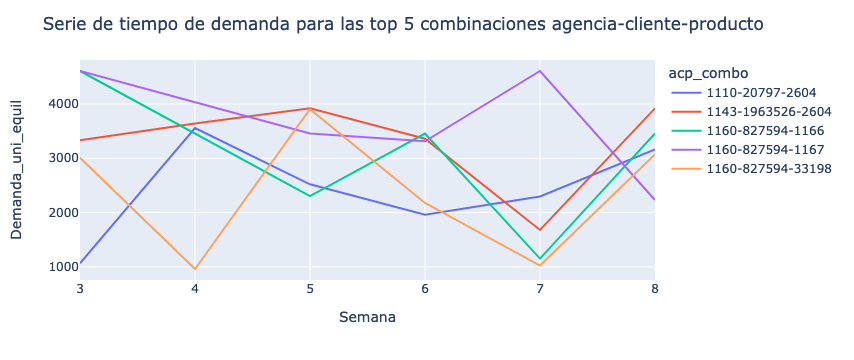

In [44]:
fig = px.line(
    dfx,
    x="Semana", y="Demanda_uni_equil", color="acp_combo"
)


fig.update_layout(
    title="Serie de tiempo de demanda para las top 5 combinaciones agencia-cliente-producto"
)

fig.show()

### Which agency is the most important in terms of sales?

#### Working dataframe

In [77]:
dfx = dftr.copy()

In [78]:
dfx

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
7974413,8,1173,4,6609,4549706,1242,2,15.40,0,0.0,2
7974414,8,1173,4,6609,4549706,5310,12,60.48,0,0.0,12
7974415,8,1173,4,6609,4549706,40447,10,108.00,0,0.0,10
7974416,8,1173,4,6609,4549706,40450,18,331.20,0,0.0,18


#### Simplifying dataframe to only relevant data

In [80]:
rc = [
    "Agencia_ID",
    "Demanda_equil"
]

dfx = dfx.loc[:, rc]

In [81]:
dfx

,Agencia_ID,Demanda_equil
0,1110,25.14
1,1110,33.52
2,1110,39.32
3,1110,33.52
4,1110,22.92
...,...,...
7974413,1173,15.40
7974414,1173,60.48
7974415,1173,108.00
7974416,1173,331.20


#### Quantifying sales per agency to find top agencies

In [82]:
dfx = dfx.groupby(["Agencia_ID"]).sum().sort_values(by="Demanda_equil", ascending=False)

In [83]:
dfx["Part"] = dfx["Demanda_equil"]/dfx["Demanda_equil"].sum()

In [85]:
dfx = dfx[:10]

In [92]:
dfx = pd.merge(
    dfx, dfl, right_on="Agencia_ID", left_index=True
)

In [93]:
dfx

,Demanda_equil,Part,Agencia_ID,Town,State
16,5.670517e+07,0.088353,1129,2011 AG. SAN ANTONIO,"MÉXICO, D.F."
22,5.318044e+07,0.082861,1142,2013 AG. MEGA NAUCALPAN,ESTADO DE MÉXICO
4,5.183457e+07,0.080764,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."
36,3.986136e+07,0.062108,1168,2092 AG. SANTA CLARA AUTOSERVICIOS,ESTADO DE MÉXICO
14,2.626647e+07,0.040926,1126,2017 AG. SANTA CLARA,ESTADO DE MÉXICO
10,2.552830e+07,0.039776,1121,2016 AG. SAN LORENZO,"MÉXICO, D.F."
12,2.447068e+07,0.038128,1123,2094 CHALCO_BM,ESTADO DE MÉXICO
11,2.320413e+07,0.036154,1122,2019 AG. XALOSTOC,ESTADO DE MÉXICO
5,2.309649e+07,0.035987,1116,2011 AG. SAN ANTONIO,"MÉXICO, D.F."
6,2.283344e+07,0.035577,1117,2001 AG. ATIZAPAN,ESTADO DE MÉXICO


In [97]:
top_ag = dfx.iloc[0, :].to_dict()

In [98]:
top_ag

{'Demanda_equil': 56705165.95000031,
 'Part': 0.08835265117271382,
 'Agencia_ID': 1129,
 'Town': '2011 AG. SAN ANTONIO',
 'State': 'MÉXICO, D.F.'}

### Which clients are the most important in the selected agency (Agencia_ID = 1129)? 

#### Working dataframe

In [105]:
dfx = dftr.copy()

In [106]:
dfx

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Demanda_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,25.14
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4,33.52
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4,39.32
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4,33.52
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3,22.92
...,...,...,...,...,...,...,...,...,...,...,...,...
7974413,8,1173,4,6609,4549706,1242,2,15.40,0,0.0,2,15.40
7974414,8,1173,4,6609,4549706,5310,12,60.48,0,0.0,12,60.48
7974415,8,1173,4,6609,4549706,40447,10,108.00,0,0.0,10,108.00
7974416,8,1173,4,6609,4549706,40450,18,331.20,0,0.0,18,331.20


#### Simplifying dataframe to leave only relevant data for this question

In [110]:
mc1 = [
    "Cliente_ID",
    "Demanda_equil"
]

mr1 = dfx["Agencia_ID"] == top_ag["Agencia_ID"]

dfx = dfx.loc[mr1, mc1]

In [111]:
dfx

,Cliente_ID,Demanda_equil
975616,22742,354.64
975617,22742,533.16
975618,22742,489.60
975619,22742,377.04
975620,22742,336.60
...,...,...
7569940,4669106,932.40
7569941,4669106,2433.00
7569942,4669106,404.26
7569943,4669106,3129.28


#### Finding most important clients

In [117]:
dfx = dfx.groupby(["Cliente_ID"]).sum().sort_values(by="Demanda_equil", ascending=False)

In [119]:
dfx["Part"] = dfx["Demanda_equil"]/dfx["Demanda_equil"].sum()

In [129]:
dfx

,Demanda_equil,Part
Cliente_ID,,
22534,1528481.66,0.026955
20577,1444223.25,0.025469
20990,1430528.53,0.025227
22462,1338370.04,0.023602
17851,1324882.31,0.023364
...,...,...
22828,40418.79,0.000713
16069,21738.35,0.000383
28926,17097.50,0.000302


In [151]:
selects = 55

dfx2 = dfx[:selects].copy()
print(
    "The top {} clients of agency {} represent {} of the demand value (in pesos)".format(
        selects,
        top_ag["Agencia_ID"],
        round(dfx2["Part"].sum(), 2)
    )
)

The top 55 clients of agency 1129 represent 0.8 of the demand value (in pesos)


In [155]:
dfcs = pd.merge(
    dfx2, dfc, right_on="Cliente_ID", left_index=True
)

In [158]:
dfcs

,Demanda_equil,Part,Cliente_ID,NombreCliente
7876,1528481.66,0.026955,22534,MEGA COMERCIAL MEXICANA MIXCOAC
7118,1444223.25,0.025469,20577,SAMS CLUB SAN JERONIMO
7312,1430528.53,0.025227,20990,MEGA COMERCIAL MEXICANA PILARES
7848,1338370.04,0.023602,22462,WAL MART PLATEROS
5883,1324882.31,0.023364,17851,WAL MART UNIVERSIDAD
7147,1315958.76,0.023207,20626,WAL MART PERIFERICO SUR
239364,1301556.58,0.022953,688157,SAMS CLUB UNIVERSIDAD
335377,1301325.22,0.022949,1188056,CHEDRAUI UNIVERSIDAD
7126,1252713.57,0.022092,20591,MEGA COMERCIAL MEXICANA SAN JERONIMO
262599,1210736.31,0.021351,812391,MEGA COMERCIAL MEXICANA COYOACAN


In [161]:
top_clts = list(dfcs["Cliente_ID"])

### Which are the top 3 sold products in the agency's client sample?

#### Working dataframe

In [174]:
dfx = dftr.copy()

In [175]:
dfx

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Demanda_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,25.14
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4,33.52
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4,39.32
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4,33.52
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3,22.92
...,...,...,...,...,...,...,...,...,...,...,...,...
7974413,8,1173,4,6609,4549706,1242,2,15.40,0,0.0,2,15.40
7974414,8,1173,4,6609,4549706,5310,12,60.48,0,0.0,12,60.48
7974415,8,1173,4,6609,4549706,40447,10,108.00,0,0.0,10,108.00
7974416,8,1173,4,6609,4549706,40450,18,331.20,0,0.0,18,331.20


#### Simplifying dataframe to leave only relevant data for this question

In [176]:
mcs = [
    "Producto_ID",
    "Demanda_equil"
]

mr1 = dfx["Agencia_ID"] == top_ag["Agencia_ID"]
mr2 = dfx["Cliente_ID"].isin(top_clts)
mrs = mr1 & mr2

dfx = dfx.loc[mrs, mcs]

In [177]:
dfx

,Producto_ID,Demanda_equil
975616,1182,354.64
975617,2665,533.16
975618,4767,489.60
975619,30314,377.04
975620,30572,336.60
...,...,...
7569853,47886,383.36
7569854,48345,1478.00
7569855,48689,152.76
7569856,48996,6750.24


#### Finding top 3 products

In [178]:
dfx = dfx.groupby(["Producto_ID"]).sum().sort_values(by="Demanda_equil", ascending=False)

In [180]:
dfx["Part"] = dfx["Demanda_equil"]/dfx["Demanda_equil"].sum()

In [182]:
dfx = dfx[:3]

In [183]:
dfx

,Demanda_equil,Part
Producto_ID,,
34786,2550815.14,0.056198
35145,1898344.69,0.041823
48996,1887105.98,0.041576


In [188]:
dftps = pd.merge(
    dfx, dfp, right_on="Producto_ID", left_index=True
)

In [190]:
dftps

,Demanda_equil,Part,Producto_ID,NombreProducto
1174,2550815.14,0.056198,34786,Pan Integral 680g TNB BIM 34786
1272,1898344.69,0.041823,35145,Wonder 100pct con Ajonjoli 567g MTA WON 35145
2538,1887105.98,0.041576,48996,Tortillinas 22p 570g MTA TR 48996


In [191]:
top_pdts = list(dftps["Producto_ID"])

---

## Additional Notes

---
---